In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(type(train_images))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


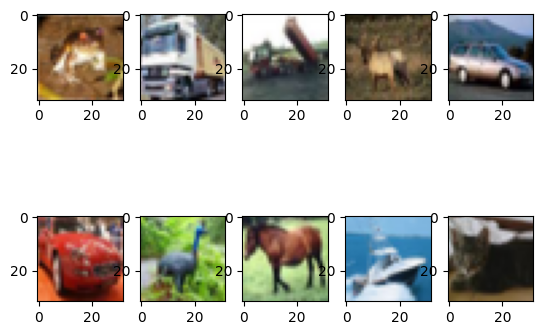

In [ ]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i])

In [ ]:
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


訓練樣本、測試樣本的正規化

In [ ]:
print('轉換前')
print(train_images[0][0][0])  # R、G、B

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print('轉換後')
print(train_images[0][0][0])

轉換前
[59 62 63]
轉換後
[0.23137255 0.24313726 0.24705882]


訓練標籤、測試標籤集的預處理:轉成 One-hot encoding

In [ ]:
print('轉換前第0筆')
print(train_labels[0])

train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

print('轉換後第0筆')
print(train_labels[0])

轉換前第0筆
[6]
轉換後第0筆
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


建構模型: 呼叫keras 的Sequential() API來建構

In [ ]:
model = Sequential()

# 第一個卷積: 我們設計為 Conv -> Conv -> Pool -> Dropout
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3))) # 設定kernel size為32個尺寸大小為3*3的，使用padding 設為same:代表卷積前後尺寸皆相同
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2))) # 池化層
model.add(Dropout(0.25))

# 第二個卷積: 我們設計為 Conv -> Conv -> Pool -> Dropout
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 後續: Flatten -> Dense -> Dropout -> Dense -> 輸出
model.add(Flatten()) # 將3維的特徵圖轉成一維的向量，才可以送出Dense layer做分類
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10,activation='softmax')) # 輸出層設定10個神經元


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_labels.shape

(50000, 10)

In [ ]:
cnn = model.fit(train_images, train_labels, batch_size=128, epochs = 20, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 19s 52ms/step - loss: 1.6524 - accuracy: 0.3973 - val_loss: 1.2865 - val_accuracy: 0.5340
Epoch 2/20
352/352 [==============================] - 17s 49ms/step - loss: 1.2309 - accuracy: 0.5594 - val_loss: 1.0843 - val_accuracy: 0.6168
Epoch 3/20
352/352 [==============================] - 17s 49ms/step - loss: 1.0408 - accuracy: 0.6294 - val_loss: 0.8787 - val_accuracy: 0.7004
Epoch 4/20
352/352 [==============================] - 17s 49ms/step - loss: 0.9183 - accuracy: 0.6772 - val_loss: 0.8009 - val_accuracy: 0.7278
Epoch 5/20
352/352 [==============================] - 17s 49ms/step - loss: 0.8305 - accuracy: 0.7068 - val_loss: 0.7629 - val_accuracy: 0.7394
Epoch 6/20
352/352 [==============================] - 17s 49ms/step - loss: 0.7635 - accuracy: 0.7316 - val_loss: 0.7033 - val_accuracy: 0.7586
Epoch 7/20
352/352 [==============================] - 17s 49ms/step - loss: 0.7085 - accuracy: 0.7495 - val_loss: 0.6766 - val_accuracy:

In [ ]:
print(cnn.history)

{'loss': [1.652403473854065, 1.230927586555481, 1.04080069065094, 0.9183259606361389, 0.8304895758628845, 0.7634955048561096, 0.7085407376289368, 0.655823290348053, 0.619540810585022, 0.5813390016555786, 0.5412386059761047, 0.5085213780403137, 0.4871315062046051, 0.4532407522201538, 0.4318678677082062, 0.414260596036911, 0.39021536707878113, 0.3728789985179901, 0.36374011635780334, 0.34673872590065], 'accuracy': [0.3972666561603546, 0.5594000220298767, 0.6293777823448181, 0.6771777868270874, 0.7067999839782715, 0.7315555810928345, 0.7495333552360535, 0.7690444588661194, 0.7801777720451355, 0.7949777841567993, 0.8073999881744385, 0.8183555603027344, 0.8275333046913147, 0.8392444252967834, 0.844688892364502, 0.8532222509384155, 0.8600000143051147, 0.8660222291946411, 0.8694666624069214, 0.8766000270843506], 'val_loss': [1.286458969116211, 1.0843180418014526, 0.8786662220954895, 0.8008537888526917, 0.7628982663154602, 0.7032915353775024, 0.6766247749328613, 0.6568676233291626, 0.644519984

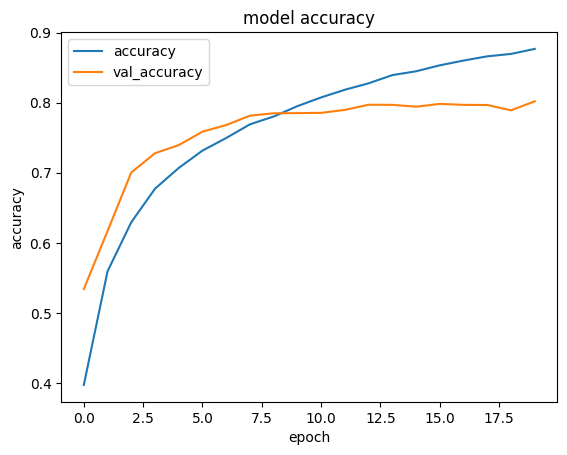

In [ ]:
plt.plot(cnn.history['accuracy'],label = 'accuracy')
plt.plot(cnn.history['val_accuracy'],label = 'val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')

plt.show()

評估

In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels) # 傳入測試集進去評估
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss,test_acc))

313/313 [==============================] - 2s 7ms/step - loss: 0.6595 - accuracy: 0.7875
loss: 0.659
acc: 0.788


預測

In [ ]:
test_ans = np.argmax(test_labels[:10],axis=1)
print(test_ans) # 正確答案

test_predictions = model.predict(test_images[:10])
print('各索引出現的機率:',test_predictions)
test_predictions = np.argmax(test_predictions,axis=1)
print('預測答案:',test_predictions)


[3 8 8 0 6 6 1 6 3 1]
1/1 [==============================] - 0s 28ms/step
各索引出現的機率: [[1.42389554e-05 1.31695087e-05 1.15463294e-07 9.87921476e-01
  2.43430467e-08 9.31859482e-03 2.70331884e-03 4.06912108e-07
  2.83022364e-05 3.77385931e-07]
 [5.88509472e-08 2.35499833e-02 1.10764127e-14 2.19989892e-17
  1.31209840e-15 1.04411655e-19 8.18979047e-15 6.28667282e-20
  9.76449728e-01 9.78062289e-08]
 [6.50554240e-01 9.07452330e-02 4.31785811e-05 4.65260127e-05
  2.69891989e-05 1.91684853e-06 1.80520274e-05 5.22189403e-05
  2.47603193e-01 1.09083410e-02]
 [9.52719510e-01 3.64813432e-02 3.26417357e-04 3.07879491e-05
  8.21687208e-05 5.17369870e-07 4.52383301e-06 4.56060292e-07
  8.63758102e-03 1.71676034e-03]
 [8.70223828e-14 3.60024732e-10 7.45696772e-04 1.21491577e-03
  7.28327222e-03 1.28489956e-08 9.90755975e-01 7.97757368e-13
  2.13345205e-12 2.17014427e-11]
 [2.48959342e-09 9.37160460e-10 2.75926359e-05 1.16908236e-03
  2.42092865e-05 2.07940844e-04 9.98569846e-01 1.38184521e-06
  7.672

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']

test_ans = np.argmax(test_labels[:10],axis=1)
print(test_ans)

print('前10筆對應到的測試標籤:',[labels[n] for n in test_ans]) # 正確答案

print('前10筆對應到的預測結果:',[labels[n] for n in test_predictions]) # 預測答案


[3 8 8 0 6 6 1 6 3 1]
前10筆對應到的測試標籤: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']
前10筆對應到的預測結果: ['cat', 'ship', 'airplane', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']
